In [3]:
import pandas as pd
df_uniteevaluationfonciere = pd.read_csv("datasets/cleaned/evaluation_with_fire_and_coordinates_and_date.csv", na_values="", 
                                         dtype={"ID_UEV": str}, )
df_uniteevaluationfonciere.dtypes

ID_UEV                  object
CIVIQUE_DEBUT            int64
CIVIQUE_FIN              int64
NOM_RUE                 object
SUITE_DEBUT             object
MUNICIPALITE             int64
ETAGE_HORS_SOL         float64
NOMBRE_LOGEMENT        float64
ANNEE_CONSTRUCTION     float64
CODE_UTILISATION         int64
LETTRE_DEBUT            object
LETTRE_FIN              object
LIBELLE_UTILISATION     object
CATEGORIE_UEF           object
MATRICULE83             object
SUPERFICIE_TERRAIN       int64
SUPERFICIE_BATIMENT    float64
NO_ARROND_ILE_CUM       object
NOM_RUE_CLEAN           object
fire_date               object
fire                      bool
ADDR_DE                float64
LONGITUDE              float64
LATITUDE               float64
dtype: object

## Number of houses close to an incident

In [ ]:
def count_fire_stats(df):
    total = len(df)
    with_fire = df['fire'].astype(bool).sum()
    without_fire = total - with_fire

    return {
        "total_houses": total,
        "houses_with_fire": with_fire,
        "houses_without_fire": without_fire
    }



In [ ]:
# Usage
stats = count_fire_stats(df_uniteevaluationfonciere)

print(f"Houses with incident: {stats['houses_with_fire']}")
print(f"Houses without incident: {stats['houses_without_fire']}")
print(f"Houses total: {stats['total_houses']}")


Houses with incident: 294767
Houses without incident: 369016
Houses total: 663783


In [ ]:
df_uniteevaluationfonciere.head()

,ID_UEV,CIVIQUE_DEBUT,CIVIQUE_FIN,NOM_RUE,SUITE_DEBUT,MUNICIPALITE,ETAGE_HORS_SOL,NOMBRE_LOGEMENT,ANNEE_CONSTRUCTION,CODE_UTILISATION,...,MATRICULE83,SUPERFICIE_TERRAIN,SUPERFICIE_BATIMENT,NO_ARROND_ILE_CUM,NOM_RUE_CLEAN,fire_date,fire,ADDR_DE,LONGITUDE,LATITUDE
0,1038405,3577,3577,avenue Atwater (MTL+WMT),NaN,50,1.0,1.0,1983.0,1921,...,9739-83-9737-8-001-0431,2,16.0,REM19,avenue atwater,NaN,False,3577.0,-73.588602,45.493711
1,5213144,5211,5211,rue du Sureau (PFD),105,50,1.0,1.0,2012.0,1000,...,7941-06-3037-4-001-0004,69,68.0,REM31,rue du sureau,NaN,False,NaN,NaN,NaN
2,1036349,3550,3550,rue de la Montagne (MTL),109,50,3.0,1.0,1983.0,1000,...,9840-31-8010-6-001-0005,133,127.0,REM19,rue de la montagne,NaN,False,NaN,NaN,NaN
3,5189527,1200,1200,rue Saint-Alexandre (MTL),511,50,1.0,1.0,1963.0,1000,...,9940-55-8522-7-001-0257,16,62.0,REM19,rue saint-alexandre,NaN,False,NaN,NaN,NaN
4,1037334,1254,1254,rue Saint-Marc (MTL),61,50,1.0,1.0,1914.0,1000,...,9839-51-6255-9-001-0013,16,82.0,REM19,rue saint-marc,2023-01-07 01:45:48,True,1254.0,-73.579815,45.492286


## Number of houses constructed beyond year 2025

In [ ]:
df_uniteevaluationfonciere["ANNEE_CONSTRUCTION_CLEAN"] = (
    pd.to_numeric(df_uniteevaluationfonciere["ANNEE_CONSTRUCTION"], errors="coerce")
    .fillna(0)
    .astype(int)
)
df_uniteevaluationfonciere["ANNEE_CONSTRUCTION_CLEAN"].head()
df_uniteevaluationfonciere[df_uniteevaluationfonciere["ANNEE_CONSTRUCTION_CLEAN"] > 2025].head()
df_uniteevaluationfonciere["ANNEE_CONSTRUCTION"] = df_uniteevaluationfonciere["ANNEE_CONSTRUCTION_CLEAN"]
df_uniteevaluationfonciere.drop(columns=["ANNEE_CONSTRUCTION_CLEAN"], inplace=True)


In [6]:
x = df_uniteevaluationfonciere[df_uniteevaluationfonciere["ANNEE_CONSTRUCTION"] > 2025]
print(f'df_uniteevaluationfonciere[df_uniteevaluationfonciere["ANNEE_CONSTRUCTION"] > 2025].head() is: {len(x)}')

df_uniteevaluationfonciere[df_uniteevaluationfonciere["ANNEE_CONSTRUCTION"] > 2025].head() is: 0


## Data Overview and Exploration

### Observations: 

In [7]:
df_uniteevaluationfonciere.shape[0]



663783

### Features (columns): 

In [8]:
df_uniteevaluationfonciere.shape[1]



24

### Data types
Target variable: fire (binary: True if property had an incident, else False)

In [9]:
df_uniteevaluationfonciere.dtypes


ID_UEV                  object
CIVIQUE_DEBUT            int64
CIVIQUE_FIN              int64
NOM_RUE                 object
SUITE_DEBUT             object
MUNICIPALITE             int64
ETAGE_HORS_SOL         float64
NOMBRE_LOGEMENT        float64
ANNEE_CONSTRUCTION       int64
CODE_UTILISATION         int64
LETTRE_DEBUT            object
LETTRE_FIN              object
LIBELLE_UTILISATION     object
CATEGORIE_UEF           object
MATRICULE83             object
SUPERFICIE_TERRAIN       int64
SUPERFICIE_BATIMENT    float64
NO_ARROND_ILE_CUM       object
NOM_RUE_CLEAN           object
fire_date               object
fire                      bool
ADDR_DE                float64
LONGITUDE              float64
LATITUDE               float64
dtype: object

## Variable Relationships and Patterns

### • Examination of relationships between key variables using visual and statistical techniques.

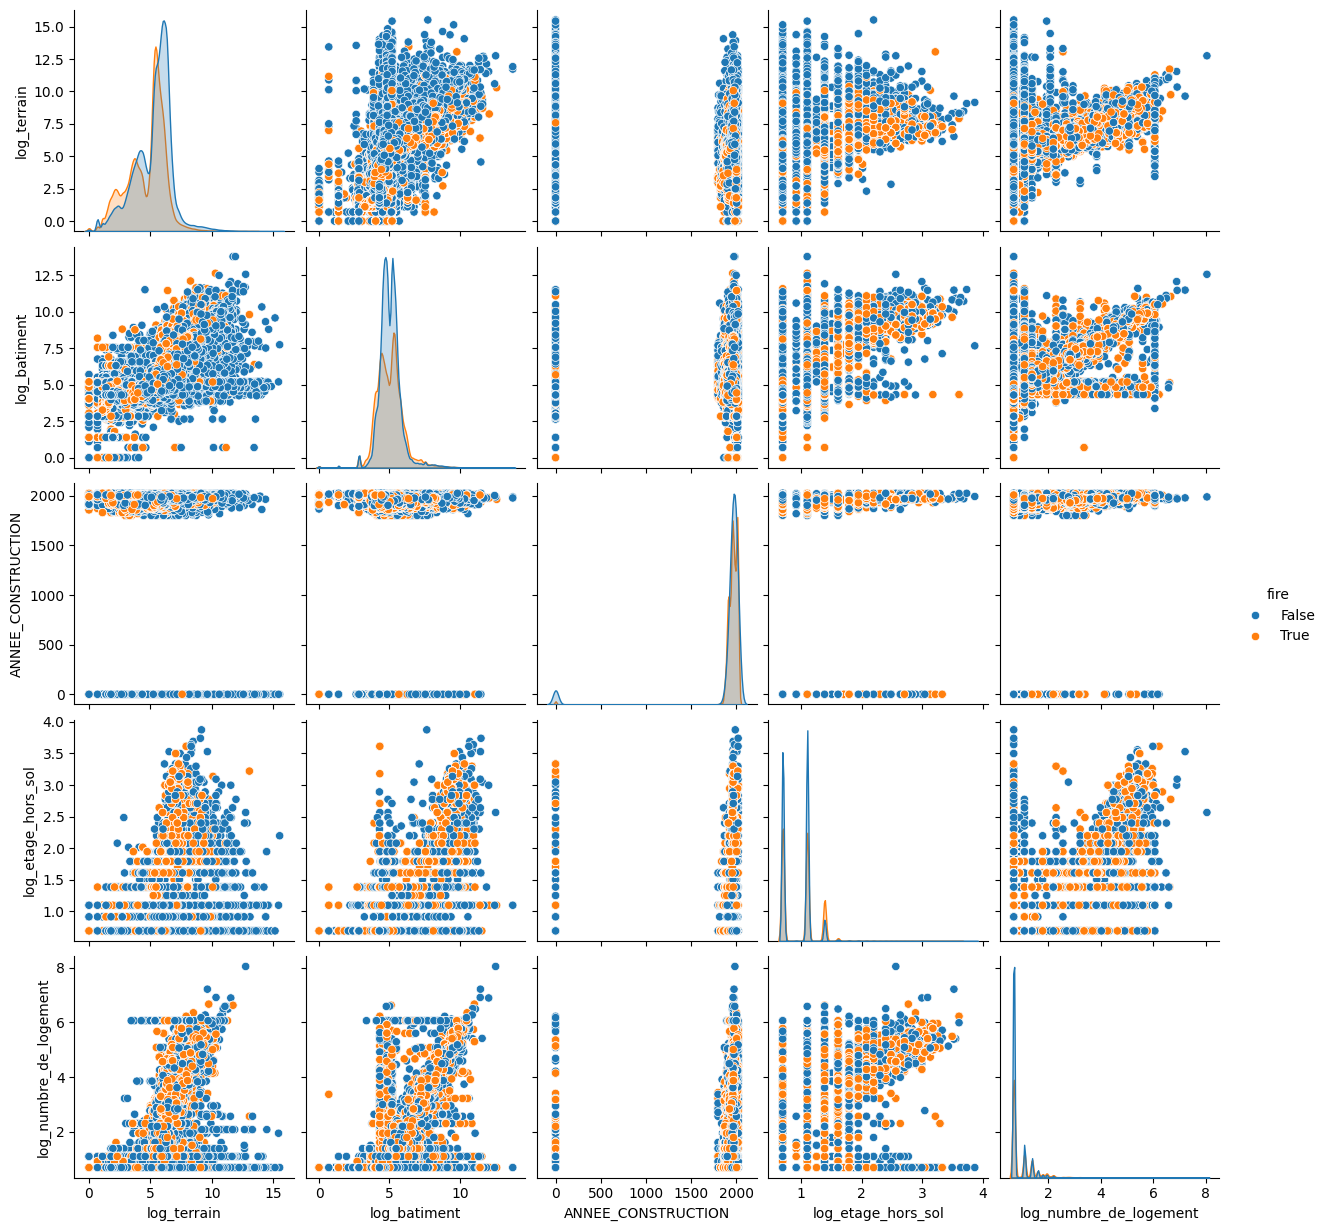

In [10]:
import seaborn as sns
import numpy as np
df_uniteevaluationfonciere["log_terrain"] = np.log1p(df_uniteevaluationfonciere["SUPERFICIE_TERRAIN"])
df_uniteevaluationfonciere["log_batiment"] = np.log1p(df_uniteevaluationfonciere["SUPERFICIE_BATIMENT"])
df_uniteevaluationfonciere["log_etage_hors_sol"] = np.log1p(df_uniteevaluationfonciere["ETAGE_HORS_SOL"])
df_uniteevaluationfonciere["log_numbre_de_logement"] = np.log1p(df_uniteevaluationfonciere["NOMBRE_LOGEMENT"])

sns.pairplot(df_uniteevaluationfonciere, vars=[
    "log_terrain", 
    "log_batiment", 
    "ANNEE_CONSTRUCTION",
    "log_etage_hors_sol",
    "log_numbre_de_logement",
    
], hue="fire")


In [11]:
print("hello world6")

hello world6


### • Identification of trends, clusters, or correlations that may inform future modeling steps.

#### Shows slight differentiation between terrain size between fire/non-fire houses

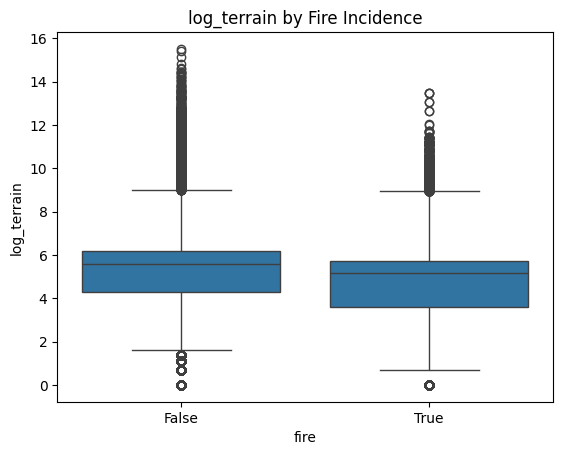

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="fire", y="log_terrain", data=df_uniteevaluationfonciere)
plt.title("log_terrain by Fire Incidence")
plt.show()


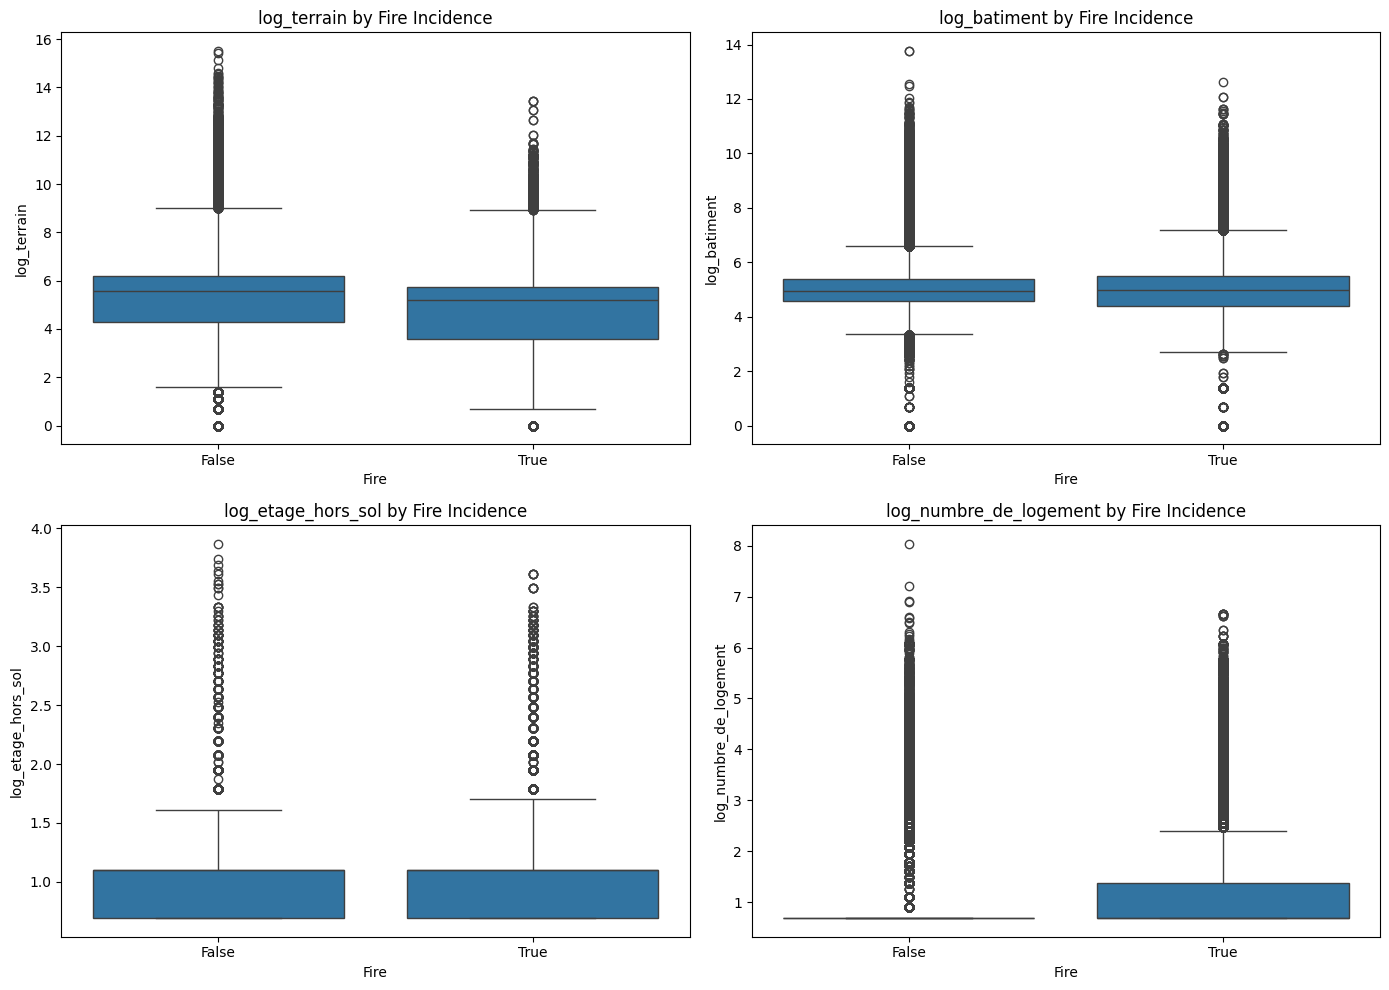

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df_uniteevaluationfonciere
log_vars = ["log_terrain", "log_batiment", "log_etage_hors_sol", "log_numbre_de_logement"]

plt.figure(figsize=(14, 10))
for i, var in enumerate(log_vars):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x="fire", y=var, data=df)
    plt.title(f"{var} by Fire Incidence")
    plt.xlabel("Fire")
    plt.ylabel(var)

plt.tight_layout()
plt.show()


## Feature engineering

In [5]:
import numpy as np

# Avoid division by zero or negative log issues by using log1p
df["log_terrain"] = np.log1p(df["SUPERFICIE_TERRAIN"])
df["log_batiment"] = np.log1p(df["SUPERFICIE_BATIMENT"])

# Compute density safely
df["density"] = df["log_batiment"] / df["log_terrain"]


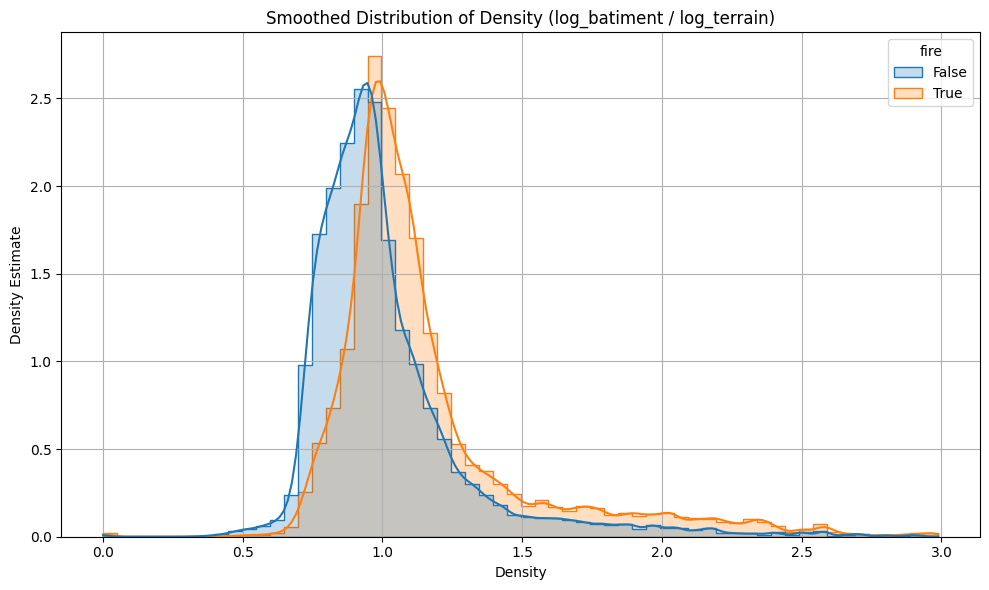

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Optional: limit extreme values to focus on main distribution
filtered_df = df[df["density"].between(0, 3)]

plt.figure(figsize=(10, 6))
sns.histplot(
    data=filtered_df,
    x="density",
    hue="fire",
    kde=True,
    bins=60,
    stat="density",
    common_norm=False,
    element="step"  # gives cleaner outlines
)
plt.title("Smoothed Distribution of Density (log_batiment / log_terrain)")
plt.xlabel("Density")
plt.ylabel("Density Estimate")
plt.grid(True)
plt.tight_layout()
plt.show()


## Model training

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import numpy as np

# Step 1: Create log features and density if not done yet
df["log_terrain"] = np.log1p(df["SUPERFICIE_TERRAIN"])
df["log_batiment"] = np.log1p(df["SUPERFICIE_BATIMENT"])
df["log_etage_hors_sol"] = np.log1p(df["ETAGE_HORS_SOL"])
df["log_numbre_de_logement"] = np.log1p(df["NOMBRE_LOGEMENT"])
df["density"] = df["log_batiment"] / df["log_terrain"]

# Step 2: Select features for modeling
features = [
    "log_terrain", 
    "log_batiment", 
    "log_etage_hors_sol", 
    "log_numbre_de_logement", 
    "ANNEE_CONSTRUCTION", 
    "density"
]
X = df[features]
y = df["fire"]



In [ ]:

# Step 3: Handle missing values
X = X.fillna(0)
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train model
#model = RandomForestClassifier(n_estimators=100, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

model.fit(X_train, y_train)

# Step 6: Evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.3f}")

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Print raw confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print ROC AUC if you have probability scores
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.3f}")

# Print detailed confusion matrix components
print("\nConfusion Matrix Details:")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print derived rates
print(f"False Positive Rate (FPR): {FP / (FP + TN):.3f}")
print(f"False Negative Rate (FNR): {FN / (FN + TP):.3f}")
print(f"True Positive Rate (Recall): {TP / (TP + FN):.3f}")
print(f"True Negative Rate (Specificity): {TN / (TN + FP):.3f}")


Confusion Matrix:
[[64073  9540]
 [ 8273 50871]]

Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.87      0.88     73613
        True       0.84      0.86      0.85     59144

    accuracy                           0.87    132757
   macro avg       0.86      0.87      0.86    132757
weighted avg       0.87      0.87      0.87    132757

ROC AUC: 0.936

Confusion Matrix Details:
True Positives (TP): 50871
True Negatives (TN): 64073
False Positives (FP): 9540
False Negatives (FN): 8273
False Positive Rate (FPR): 0.130
False Negative Rate (FNR): 0.140
True Positive Rate (Recall): 0.860
True Negative Rate (Specificity): 0.870


In [1]:
print("can we visualize the change in github?")

can we visualize the change in github?


## Predict month using random forest

In [4]:
import pandas as pd

df = df_uniteevaluationfonciere

df["fire_date"] = pd.to_datetime(df["fire_date"], errors="coerce")
df["fire_month"] = df["fire_date"].dt.month.fillna(13).astype(int)
df.head()
y = df["fire_month"]


In [8]:
# Step 3: Handle missing values
X = X.fillna(0)
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train model
#model = RandomForestClassifier(n_estimators=100, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

model.fit(X_train, y_train)

# Step 6: Evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.3f}")


Confusion Matrix:
[[64102  9511]
 [ 8319 50825]]

Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.87      0.88     73613
        True       0.84      0.86      0.85     59144

    accuracy                           0.87    132757
   macro avg       0.86      0.87      0.86    132757
weighted avg       0.87      0.87      0.87    132757

ROC AUC: 0.935


In [9]:
print("Washere")

Washere
